# 1.Python Basics

In [82]:
import numpy as np

In [83]:
data = {i : np.random.randn() for i in range(7)}

In [84]:
data

{0: -1.2422232142624132,
 1: 1.5619409031955953,
 2: 0.3477693432788992,
 3: -1.4414166746015653,
 4: -0.34692102724677687,
 5: -0.21114640293240594,
 6: -0.2788468813177433}

In [85]:
%timeit
for i in range(1000):
    i+=1

In [86]:
matplotlib inline

In [87]:
a=5
isinstance(a, int)

True

In [88]:
a=5
isinstance(a, (list,float))

False

In [89]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError: # not iterable
        return False

In [90]:
print(isiterable('a string'))
print(isiterable([1,2,3]))

True
True


### Note
just because you can mutate an object does not mean that you always should. Such actions are known as side effects. For example, when writing a function, any side effects should be explicitly communicated to the user in the function’s documentation or comments. If possible, I recommend trying to avoid side effects and favor immutability, even though there may be mutable objects involved.

In [91]:
s = '12\\34'
print(s)

p = r'this\has\no\special\characters'
print(p)

12\34
this\has\no\special\characters


###  String Templating


In [92]:
template = '{0:.2f} {1:s} are worth US${2:d}'
template.format(4.5560, 'Argentine Pesos', 1)    

'4.56 Argentine Pesos are worth US$1'

$a^3$

In [93]:
c = """
This is a longer string that
spans multiple lines
"""
c.count('\n')

3

### Unicode to UTF-8

In [94]:
val = "español"
val_utf8 = val.encode('utf-8')
val_utf8

b'espa\xc3\xb1ol'

### Note

It’s worth bearing in mind that None is not only a reserved keyword but also a unique instance of NoneType:



In [95]:
type(None)

NoneType

## Date and Time

In [96]:
from datetime import datetime, date, time

In [97]:
dt = datetime(2011, 10, 29, 20, 30, 21)
dt2 = datetime(2011, 11, 15, 22, 30)

In [98]:
print(dt.day,'\n',dt.minute)

29 
 30


In [99]:
delta = dt2 - dt
delta

datetime.timedelta(days=17, seconds=7179)

In [100]:
dt + delta

datetime.datetime(2011, 11, 15, 22, 30)

Datetime formcat specification
https://strftime.org/

In [101]:
dt.strftime("%Y-%m-%d")

'2011-10-29'

# 2.Built-in Data Structures, Functions, and Files

## Lists and Tuples

### Tuple

In [102]:
tup = 4, 5, 6
a, b, c = tup
b

5

In [103]:
b,a = a,b
a

5

In [104]:
print(a,b)

5 4


In [105]:
#unpacking nested tuples
tup = 4, 5, (6, 7)
a, b, (c, d) = tup
c

6

In [106]:
##A common use of variable unpacking is iterating over sequences of tuples or lists:
seq = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
for a, b, c in seq:
   print('a={0}, b={1}, c={2}'.format(a, b, c))

a=1, b=2, c=3
a=4, b=5, c=6
a=7, b=8, c=9


In [107]:
values = 1, 2, 3, 4, 5
a, b, *rest = values
rest


[3, 4, 5]

In [108]:
#Unwanted rest
a, b, *_ = values

In [109]:
a = (1, 2, 2, 2, 3, 4, 2)
a.count(2)

4

### List

In [110]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [111]:
#insert
tup = ('foo', 'bar', 'baz')
b_list = list(tup)
print(b_list)
b_list.insert(1, 'red')
b_list

['foo', 'bar', 'baz']


['foo', 'red', 'bar', 'baz']

In [112]:
#pop
b_list.pop(2)

'bar'

In [113]:
#concatenate
[4, None, 'foo'] + [7, 8, (2, 3)]

[4, None, 'foo', 7, 8, (2, 3)]

In [114]:
b_list

['foo', 'red', 'baz']

In [115]:
b_list.remove('red')
b_list

['foo', 'baz']

In [116]:
x=[4,'None','foo']
x.extend([7,8,(2,3)])
x

[4, 'None', 'foo', 7, 8, (2, 3)]

In [117]:
#sorting
b = ['saw', 'small', 'He', 'foxes', 'six']
b.sort(key=len)
b

['He', 'saw', 'six', 'small', 'foxes']

In [118]:
sorted('horse race')

[' ', 'a', 'c', 'e', 'e', 'h', 'o', 'r', 'r', 's']

#### Bisect
bisect.bisect finds the location where an element should be inserted to keep it sorted, while bisect.insort actually inserts the element into that location:

In [119]:
import bisect
c = [1, 2, 2, 2, 3, 4, 7]
print(bisect.bisect(c, 2))
print(bisect.bisect(c, 5))
bisect.insort(c, 6)

4
6


In [120]:
c

[1, 2, 2, 2, 3, 4, 6, 7]

In [121]:
#slicing
seq = [7, 2, 3, 7, 5, 6, 0, 1]
seq[::2]

[7, 3, 5, 0]

In [122]:
#reversing
seq[::-1]

[1, 0, 6, 5, 7, 3, 2, 7]

Python has a built-in function, enumerate, which returns a sequence of (i, value) tuples:

In [123]:
#enumerate
#i: iteration, v:value
some_list = ['foo', 'bar', 'baz']
for i, v in enumerate(some_list):
    print(i,v)

0 foo
1 bar
2 baz


In [124]:
mapping = {}
for i, v in enumerate(some_list):
    mapping[v] = i
mapping

{'foo': 0, 'bar': 1, 'baz': 2}

### Zip & Unzip

In [125]:
seq1 = ['foo', 'bar', 'baz','futile']
seq2 = ['one', 'two', 'three']
zipped = zip(seq1, seq2)
list(zipped)

[('foo', 'one'), ('bar', 'two'), ('baz', 'three')]

zip can take an arbitrary number of sequences, and the number of elements it produces is determined by the shortest sequence:

In [126]:
seq3 = [False, True]
list(zip(seq1, seq2, seq3))


[('foo', 'one', False), ('bar', 'two', True)]

A very common use of zip is simultaneously iterating over multiple sequences, possibly also combined with enumerate:



In [127]:
for i, (a, b) in enumerate(zip(seq1, seq2)):
    print('{0}: {1}, {2}'.format(i, a, b))

0: foo, one
1: bar, two
2: baz, three


In [128]:
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'), ('Schilling', 'Curt')]
first_names, last_names = zip(*pitchers)
print(first_names)
print(last_names)

('Nolan', 'Roger', 'Schilling')
('Ryan', 'Clemens', 'Curt')


## Dict

In [129]:
d1 = {'a' : 'some value', 'b' : [1, 2, 3, 4]}
d1[7] = 'an integer'
d1[5] = 'some value'
d1['dummy'] = 'another value'
print(d1)
d1.pop('dummy')

{'a': 'some value', 'b': [1, 2, 3, 4], 7: 'an integer', 5: 'some value', 'dummy': 'another value'}


'another value'

In [130]:
print(list(d1.keys()))
print(list(d1.values()))

['a', 'b', 7, 5]
['some value', [1, 2, 3, 4], 'an integer', 'some value']


In [131]:
d1.update({'b' : 'foo', 'c' : 12})


 categorizing a list of words by their first letters as a dict of lists:

In [132]:
words = ['apple', 'bat', 'bar', 'atom', 'book']
dict={}
for w in words:
    if w[0] not in dict:
        dict[w[0]] = [w]
    else:
        dict[w[0]].append(w)

In [133]:
dict

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}

## List Comprehension


In [134]:
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']
[x.upper() for x in strings if len(x) > 2]

['BAT', 'CAR', 'DOVE', 'PYTHON']

suppose we wanted to get a single list containing all names with two or more e’s in them

In [135]:
all_data = [['John', 'Emily', 'Michael', 'Mary', 'Steven'],['Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']]
import itertools

In [136]:
#Method1
L = list()
L.extend(v for i,v in enumerate(all_data))

#E = [L[i][j] for i,j in tuple(range(len(L)), range(len(L[i])))]    
E = [L[i][j] for i in range(len(L)) for j in range(len(L[i])) if L[i][j].count('e')>=2]    

In [137]:
E

['Steven']

In [138]:
#Method2
names_of_interest = []
for names in all_data:
    enough_es = [name for name in names if name.count('e') >= 2]
    names_of_interest.extend(enough_es)
names_of_interest

['Steven']

In [139]:
#Method3
result = [name for names in all_data for name in names if name.count('e') >= 2]
result

['Steven']

In [140]:
#Flattening
##Method1
some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
flatten = [some_tuples[i][j] for i in range(len(some_tuples)) for j in range(len(some_tuples[i]))]

In [141]:
flatten

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [142]:
flat = [i for j in some_tuples for i in j]
flat

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [143]:
[[i for i in j] for j in some_tuples]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

## Functions

Suppose we were doing some data cleaning and needed to apply a bunch of transformations to the following list of strings:

In [144]:
states = ['   Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda', 'south   carolina##', 'West virginia?']

Anyone who has ever worked with user-submitted survey data has seen messy results like these. Lots of things need to happen to make this list of strings uniform and ready for analysis: stripping whitespace, removing punctuation symbols, and standardizing on proper capitalization. One way to do this is to use built-in string methods along with the re standard library module for regular expressions:

In [145]:

import re

def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?]', '', value)
        value = value.title()
        result.append(value)
    return result

clean_strings(states)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South   Carolina',
 'West Virginia']

### List of Operations

In [146]:
##cleaning strings data
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings2(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

In [147]:
clean_strings2(states,clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South   Carolina',
 'West Virginia']

In [148]:
for x in map(remove_punctuation, states):
    print(x)

   Alabama 
Georgia
Georgia
georgia
FlOrIda
south   carolina
West virginia


In [149]:
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]
apply_to_list(ints, lambda x: x * 2)


[8, 0, 2, 10, 12]

suppose you wanted to sort a collection of strings by the number of distinct letters in each string:

In [150]:


strings = ['foo', 'card', 'bar', 'aaaa', 'abab']
#Method1
o=[len(set(strings[i])) for i in range(len(strings))]
dictt = dict(zip(o,strings))

TypeError: 'dict' object is not callable

In [ ]:
dictt

In [ ]:
s = sorted(dictt.items())
s

In [ ]:
strings_new = [i[1] for i in s]
strings_new

In [ ]:
#Method2
strings.sort(key=lambda x: len(set(list(x))))
strings

In [ ]:
#Method3
strings.sort(key=lambda x: len(list(x)))
strings

In [151]:
set(list(strings))

{'aaaa', 'abab', 'bar', 'card', 'foo'}

# 3.Numpy

In [4]:
import numpy as np

my_arr = np.arange(1000000)

my_list = list(range(1000000))


In [5]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 12 ms, sys: 1.6 ms, total: 13.6 ms
Wall time: 12.8 ms


In [6]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 445 ms, sys: 199 ms, total: 645 ms
Wall time: 644 ms


In [12]:
E = np.empty((2, 3, 2))
E

array([[[4.64539163e-310, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

In [13]:
np.full((3,3),5)

array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]])

In [15]:
np.full_like(E,5)

array([[[5., 5.],
        [5., 5.],
        [5., 5.]],

       [[5., 5.],
        [5., 5.],
        [5., 5.]]])

In [18]:
arr = np.array([1, 2, 3], dtype=np.int32)
arr
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

### Note
It’s important to be cautious when using the numpy.string_ type, as string data in NumPy is fixed size and may truncate input without warning. pandas has more intuitive out-of-the-box behavior on non-numeric data.


Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this vectorization. Any arithmetic operations between equal-size arrays applies the operation element-wise:

Operations between differently sized arrays is called broadcasting

An important first distinction from Python’s built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array. To demonstrate this:


In [25]:
#List

a = [1,2,3,4]
b = a[1:3] 
b[1] = 0
print(a)
print(b)

[1, 2, 3, 4]
[2, 0]


In [24]:
#Array
c = np.array([1,2,3,4])
d = c[1:3]
d[1] = 0
print(c)
print(d)

[1 2 0 4]
[2 0]


In [26]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[0,1])
arr2d[0,1]

2


2

### Multidimensional Array

In [29]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)
arr3d.shape

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


(2, 2, 3)

In [30]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

$2*2*3$ is like having $2$ sets of $2*3$ arrays. That's why arr3d[0] is a single $2*3$ array. The expression arr3d[1,0] is the same as though we had indexed in two steps.

### Boolean Indexing

In [2]:
import numpy as np

In [3]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [6]:
data

array([[ 0.72873689,  1.48878666,  0.58288287,  0.01513761],
       [ 0.2225798 , -0.09307385, -1.08526548, -0.09779996],
       [ 0.45291702, -1.28728381,  0.15833543,  0.17158722],
       [-1.6259612 ,  0.41481365,  0.0254616 ,  1.29796027],
       [ 0.4342732 ,  0.37176385, -0.05354947, -0.53953956],
       [-0.73286168, -1.23684501, -0.8097793 , -1.02618908],
       [-1.17124837, -0.29905155, -0.24223672,  0.41300368]])

In [5]:
data[names == 'Bob']

array([[ 0.72873689,  1.48878666,  0.58288287,  0.01513761],
       [-1.6259612 ,  0.41481365,  0.0254616 ,  1.29796027]])

In [7]:
data.shape

(7, 4)

In [10]:
data[~(names == 'Bob')] == data[names != 'Bob']

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [9]:
data[names != 'Bob']

array([[ 0.2225798 , -0.09307385, -1.08526548, -0.09779996],
       [ 0.45291702, -1.28728381,  0.15833543,  0.17158722],
       [ 0.4342732 ,  0.37176385, -0.05354947, -0.53953956],
       [-0.73286168, -1.23684501, -0.8097793 , -1.02618908],
       [-1.17124837, -0.29905155, -0.24223672,  0.41300368]])

### Note
Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

In [11]:
data[data < 0] = 0
data

array([[0.72873689, 1.48878666, 0.58288287, 0.01513761],
       [0.2225798 , 0.        , 0.        , 0.        ],
       [0.45291702, 0.        , 0.15833543, 0.17158722],
       [0.        , 0.41481365, 0.0254616 , 1.29796027],
       [0.4342732 , 0.37176385, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.41300368]])

In [13]:
arr = np.empty((8, 4))
for i in range(8):
   arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [14]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [15]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [16]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

### Note
fancy indexing, unlike slicing, always copies the data into a new array. To demonstrate this:

In [5]:
import numpy as np 
arr = np.random.randn(3,4)
print(arr)
b = arr[0,0:1]
b

[[ 0.79943277  1.62557523 -1.07084545 -0.58318865]
 [ 0.02643251 -0.31637256  0.63300057  0.25411372]
 [ 1.25822036  0.46360316 -0.33143027 -0.04849488]]


array([0.79943277])

In [6]:
b [0] = 0 
arr

array([[ 0.        ,  1.62557523, -1.07084545, -0.58318865],
       [ 0.02643251, -0.31637256,  0.63300057,  0.25411372],
       [ 1.25822036,  0.46360316, -0.33143027, -0.04849488]])

In [9]:
arr = np.random.randn(3,4)
print(arr)
c = arr[[0,1]][:1]
c

[[ 1.49089554  0.28521435  0.90575933 -0.68778083]
 [ 0.03232968 -0.28530766  0.615536    2.36314683]
 [ 0.6368922  -0.32042345 -0.50852833  0.56276727]]


array([[ 1.49089554,  0.28521435,  0.90575933, -0.68778083]])

In [10]:
c.shape

(1, 4)

In [13]:
c[0,0] = c[0,1] = c[0,2] = c[0,3] = 0

In [14]:
c

array([[0., 0., 0., 0.]])

In [15]:
arr

array([[ 1.49089554,  0.28521435,  0.90575933, -0.68778083],
       [ 0.03232968, -0.28530766,  0.615536  ,  2.36314683],
       [ 0.6368922 , -0.32042345, -0.50852833,  0.56276727]])

While not common, a ufunc can return multiple arrays. modf is one example, a vectorized version of the built-in Python divmod; it returns the fractional and integral parts of a floating-point array:

In [3]:
arr = np.random.randn(7) * 5
arr

array([-5.24390734, -4.38991392, -1.02482011, -3.80574126,  1.63572383,
        4.90692444,  2.68553879])

In [4]:
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[-0.24390734 -0.38991392 -0.02482011 -0.80574126  0.63572383  0.90692444
  0.68553879]
[-5. -4. -1. -3.  1.  4.  2.]


In [5]:
arr = np.random.randn(100)
(arr > 0).sum()

56

In [7]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


In [10]:
arr = np.random.randn(5, 3)
arr

array([[ 5.03672972e-01,  2.19314998e-01,  9.27458859e-01],
       [ 1.79552584e+00, -4.95663045e-01,  1.50269304e+00],
       [ 7.54442328e-01, -7.32264165e-02, -1.11608616e+00],
       [ 8.39487291e-01, -1.87299274e+00,  1.26613537e+00],
       [ 8.64565435e-01,  1.80073113e+00, -3.55241798e-04]])

In [12]:
arr.sort(1)
arr

array([[ 2.19314998e-01,  5.03672972e-01,  9.27458859e-01],
       [-4.95663045e-01,  1.50269304e+00,  1.79552584e+00],
       [-1.11608616e+00, -7.32264165e-02,  7.54442328e-01],
       [-1.87299274e+00,  8.39487291e-01,  1.26613537e+00],
       [-3.55241798e-04,  8.64565435e-01,  1.80073113e+00]])

In [16]:
arr2 = np.random.randn(5,3,4)
print(arr2)
arr2.sort(2)
arr2

[[[-0.40723297 -0.85988364  0.92888227 -0.63591297]
  [-0.40707031  1.84141471 -0.32875985  0.52266487]
  [ 0.99628786 -0.38097299  0.37026913  0.01507789]]

 [[ 0.60466094 -0.40741263  2.37647278 -0.89041857]
  [-0.56717729  0.01282746  0.07321709 -0.80939565]
  [ 0.72658774  1.70885776  0.48953959 -0.26044425]]

 [[ 0.9461825  -0.89183721  0.25113792 -0.03173124]
  [ 0.89173325  0.31300863 -0.77051096  0.42946057]
  [-1.7284846   1.31179805  0.27840838  0.24617454]]

 [[-0.45349481  0.37992199 -0.78994296  0.8935878 ]
  [-0.7037499   1.0371774   0.45988865 -0.96748928]
  [-1.09535868 -0.84279014 -0.52215903 -0.2237539 ]]

 [[-0.16305527 -0.28896409 -0.74740259  0.86946764]
  [ 2.48388007  2.20385894 -1.00544878  1.80676711]
  [-0.06897707  0.16465617  0.16353849 -1.55008677]]]


array([[[-0.85988364, -0.63591297, -0.40723297,  0.92888227],
        [-0.40707031, -0.32875985,  0.52266487,  1.84141471],
        [-0.38097299,  0.01507789,  0.37026913,  0.99628786]],

       [[-0.89041857, -0.40741263,  0.60466094,  2.37647278],
        [-0.80939565, -0.56717729,  0.01282746,  0.07321709],
        [-0.26044425,  0.48953959,  0.72658774,  1.70885776]],

       [[-0.89183721, -0.03173124,  0.25113792,  0.9461825 ],
        [-0.77051096,  0.31300863,  0.42946057,  0.89173325],
        [-1.7284846 ,  0.24617454,  0.27840838,  1.31179805]],

       [[-0.78994296, -0.45349481,  0.37992199,  0.8935878 ],
        [-0.96748928, -0.7037499 ,  0.45988865,  1.0371774 ],
        [-1.09535868, -0.84279014, -0.52215903, -0.2237539 ]],

       [[-0.74740259, -0.28896409, -0.16305527,  0.86946764],
        [-1.00544878,  1.80676711,  2.20385894,  2.48388007],
        [-1.55008677, -0.06897707,  0.16353849,  0.16465617]]])

In [17]:
arr2.sort(1)
arr2

array([[[-0.85988364, -0.63591297, -0.40723297,  0.92888227],
        [-0.40707031, -0.32875985,  0.37026913,  0.99628786],
        [-0.38097299,  0.01507789,  0.52266487,  1.84141471]],

       [[-0.89041857, -0.56717729,  0.01282746,  0.07321709],
        [-0.80939565, -0.40741263,  0.60466094,  1.70885776],
        [-0.26044425,  0.48953959,  0.72658774,  2.37647278]],

       [[-1.7284846 , -0.03173124,  0.25113792,  0.89173325],
        [-0.89183721,  0.24617454,  0.27840838,  0.9461825 ],
        [-0.77051096,  0.31300863,  0.42946057,  1.31179805]],

       [[-1.09535868, -0.84279014, -0.52215903, -0.2237539 ],
        [-0.96748928, -0.7037499 ,  0.37992199,  0.8935878 ],
        [-0.78994296, -0.45349481,  0.45988865,  1.0371774 ]],

       [[-1.55008677, -0.28896409, -0.16305527,  0.16465617],
        [-1.00544878, -0.06897707,  0.16353849,  0.86946764],
        [-0.74740259,  1.80676711,  2.20385894,  2.48388007]]])

In [20]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [21]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
sorted(set(names))

['Bob', 'Joe', 'Will']

In [23]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

### Pseudorandom Number Generator

In [5]:
import random
import numpy as np
random.seed(9004)
random.randint(1, 10)

8

In [2]:
random.seed(9004)
random.randint(1, 10)

8

In [3]:
N = 1000000
%timeit samples = [random.normalvariate(0, 1) for _ in range(N)]

682 ms ± 5.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit np.random.normal(size=N)

37 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Random Walk

In [17]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)


In [23]:
def walk(steps):
    position = 0
    walk = [position]
    for i in range(steps):
        step = 1 if random.randint(0,1) else -1
        position += step
        walk.append(position)
    return walk

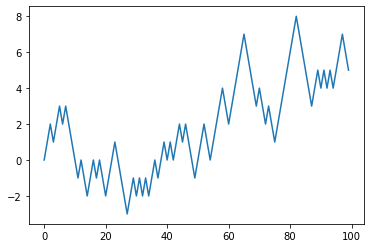

In [26]:
plt.plot(walk(500)[:100])


In [32]:
def arwalk(nsteps):
    draws = np.random.randint(0, 2, size=nsteps)
    steps = np.where(draws > 0, 1, -1)
    return steps.cumsum()

In [36]:
walk = arwalk(100)
walk.min()

-16

In [37]:
walk

array([ -1,   0,  -1,  -2,  -3,  -4,  -5,  -4,  -5,  -6,  -5,  -4,  -5,
        -6,  -5,  -6,  -7,  -8,  -9, -10, -11, -10,  -9,  -8,  -7,  -8,
        -9,  -8,  -9,  -8,  -9, -10,  -9,  -8,  -7,  -6,  -7,  -8,  -9,
        -8,  -9, -10,  -9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -3,  -4,  -5,  -6,  -7,  -6,  -7,  -6,  -7,  -6,  -7,  -8,  -9,
       -10, -11, -12, -11, -10, -11, -10, -11, -12, -11, -12, -11, -10,
        -9,  -8,  -7,  -8,  -9, -10, -11, -12, -13, -14, -15, -16, -15,
       -16, -15, -14, -13, -12, -11, -10, -11, -12])

we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction

In [38]:
(np.abs(walk) >= 10).argmax()

19

### Simulating many random walks at once

In [4]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,   0,  -1, ...,   2,   3,   2],
       [ -1,  -2,  -3, ...,  -8,  -7,  -8],
       [ -1,   0,   1, ..., -18, -17, -16],
       ...,
       [  1,   0,  -1, ..., -10, -11, -12],
       [  1,   0,  -1, ...,  10,   9,  10],
       [ -1,  -2,  -3, ...,  -8,  -7,  -8]])

In [27]:
walks.shape

(5000, 1000)

In [5]:
walks.max()

118

In [6]:
walks.min()

-120

Let’s compute the minimum crossing time to 30 or –30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the any method:

In [24]:
hits30 = (np.abs(walks) >= 30).any(1)

In [26]:
hits30

array([ True,  True,  True, ..., False, False, False])

In [25]:
hits30.shape

(5000,)

In [10]:
 hits30.sum()

3383

In [46]:
crossing_walks = np.abs(walks[hits30 == True])

In [47]:
crossing_walks

array([[ 1,  0,  1, ...,  2,  3,  2],
       [ 1,  2,  3, ...,  8,  7,  8],
       [ 1,  0,  1, ..., 18, 17, 16],
       ...,
       [ 1,  2,  1, ..., 24, 25, 24],
       [ 1,  0,  1, ..., 44, 43, 42],
       [ 1,  2,  1, ..., 46, 47, 48]])

In [48]:
crossing_walks.shape

(3383, 1000)

In [49]:
np.abs(walks[hits30]) >= 30

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [50]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [51]:
crossing_times

array([513, 217, 795, ..., 415, 403, 571])

In [52]:
crossing_walks[0,513]

30

In [54]:
crossing_walks[1,217]

30